In [52]:
import numpy as np
import jax.numpy as jnp
from jax import jit
import matplotlib.pyplot as plt
import scipy as sp


## Orbital Raising from MIT OCW 16.323 Lec 7

In [4]:
m0 = 5
mu = 1
m1=-.07485
T=.1405
Tf = 4
r0=1

In [5]:
def dx(t,xp):
  normalizer = np.sqrt(xp[1]**2+xp[2]**2)
  cosphi = -xp[4]/normalizer
  sinphi = -xp[5]/normalizer
  return np.array([ # r u v p1 p2 p3
    xp[1],
    xp[2]**2/xp[0] - mu/xp[0]**2 + T*sinphi/(m0-np.abs(m1)*t),
    -xp[1]*xp[2]/xp[0] + T*cosphi/(m0-np.abs(m1)*t),
    -xp[4]*(-xp[2]**2/xp[0]**2 + 2*mu/xp[0]**3) - xp[5]*(xp[1]*xp[2]/xp[0]**2),
    -xp[3] + xp[5]*xp[2]/xp[0],
    -xp[4]*2*xp[2]/xp[0] + xp[5]*xp[1]/xp[0]
  ])
def bvp_residual(xp0,xpf):
  return np.array([ # r0 u0 v0 rf uf vf
    xp0[0]-r0,
    xp0[1],
    xp0[2]-np.sqrt(mu/xp0[0]),
    xpf[3] + 1 - xpf[5]*np.sqrt(mu)*(xpf[0]**-1.5)/2,
    xpf[1],
    xpf[2]-np.sqrt(mu/xpf[0])
  ])

In [6]:
n = 1000
x0 = np.array([r0,0,np.sqrt(mu/r0),0,0,0])
print(x0)
x = np.ones((6,n))
x[:,0] = x0
t = np.linspace(0,Tf,n)

sol = sp.integrate.solve_bvp(dx,bvp_residual,t,x)

[1. 0. 1. 0. 0. 0.]


/tmp/ipykernel_3746/1297379296.py:18: RuntimeWarning: invalid value encountered in scalar power
  xpf[3] + 1 - xpf[5]*np.sqrt(mu)*(xpf[0]**-1.5)/2,
/tmp/ipykernel_3746/1297379296.py:20: RuntimeWarning: invalid value encountered in sqrt
  xpf[2]-np.sqrt(mu/xpf[0])


<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3746/2709768830.py:5: SyntaxWarning: invalid escape sequence '\p'
  plt.plot(t,phi,label=f"$\phi$")


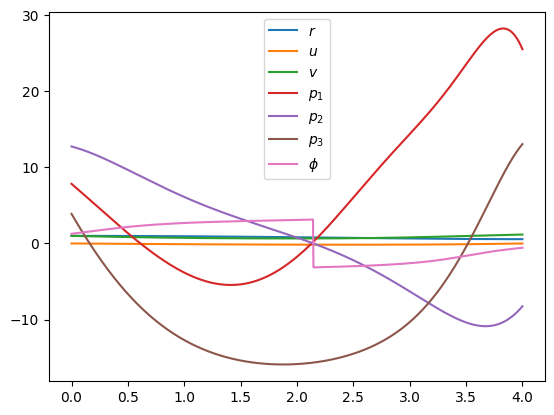

In [7]:
labels=[f"$r$",f"$u$",f"$v$",f"$p_1$",f"$p_2$",f"$p_3$"]
phi = np.arctan2(sol.y[4,:],sol.y[5,:])
for i,lab in enumerate(labels):
  plt.plot(t,sol.y[i,:],label=lab)
plt.plot(t,phi,label=f"$\phi$")
plt.legend()
plt.show()

## Phase Portraits & Dynamics Tools: Damped Nonlinear Pendulum

In [89]:
from dynamics_tools import prop_control

In [90]:
m = 1
l = 1
g = 9.8
b = .2
x0 = np.array([np.pi/3,10])
N = 1000
tf = 10
def fu(ti,xi):
  return 0
def fx(ti,xi,ui):
  return np.array([
    xi[1],
    (ui - m*g*l*np.sin(xi[0]) - b*xi[1])/m/l/l
  ])

In [91]:
xt = prop_control(fx,fu,x0,tf,N,2)

Text(0.5, 1.0, 'Phase Portrait')

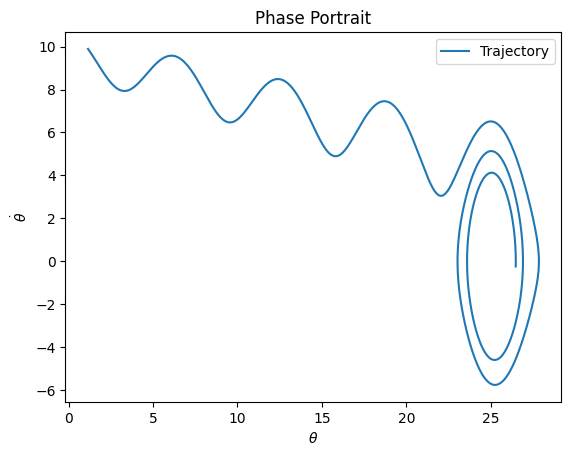

In [92]:
plt.plot(xt[:,0],xt[:,1],label=r"Trajectory")
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.legend()
plt.title("Phase Portrait")

## Cart-Pole

In [10]:
def dx(t,xp): # xp = theta thetadot x p1 p2 p3
  return np.array(
    [
      
    ]
  )

In [11]:
x0 = np.array(0,0,0)
xf = np.array(np.pi,0,0)


TypeError: array() takes from 1 to 2 positional arguments but 3 were given